<a href="https://colab.research.google.com/github/palmmywatch/data_science_bootcamp07/blob/main/Data_Visualization_txhousing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Visualization
txhousing dataset

## Txhousing

The `txhousing` dataset contains information on the sales of houses in Texas from 2008 to 2016

## Library

In [ ]:
library(dplyr)
library(ggplot2)
library(tidyverse)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.2.1     ✔ purrr   1.0.1
✔ tidyr   1.3.0     ✔ stringr 1.4.1
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Dataset

In [ ]:
txh <- txhousing
glimpse(txh)

Rows: 8,602
Columns: 9
$ city      <chr> "Abilene", "Abilene", "Abilene", "Abilene", "Abilene", "Abil…
$ year      <int> 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, …
$ month     <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, …
$ sales     <dbl> 72, 98, 130, 98, 141, 156, 152, 131, 104, 101, 100, 92, 75, …
$ volume    <dbl> 5380000, 6505000, 9285000, 9730000, 10590000, 13910000, 1263…
$ median    <dbl> 71400, 58700, 58100, 68600, 67300, 66900, 73500, 75000, 6450…
$ listings  <dbl> 701, 746, 784, 785, 794, 780, 742, 765, 771, 764, 721, 658, …
$ inventory <dbl> 6.3, 6.6, 6.8, 6.9, 6.8, 6.6, 6.2, 6.4, 6.5, 6.6, 6.2, 5.7, …
$ date      <dbl> 2000.000, 2000.083, 2000.167, 2000.250, 2000.333, 2000.417, …


## Chart 1: Histogram of The Median House Value

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 616 rows containing non-finite values (`stat_bin()`).”


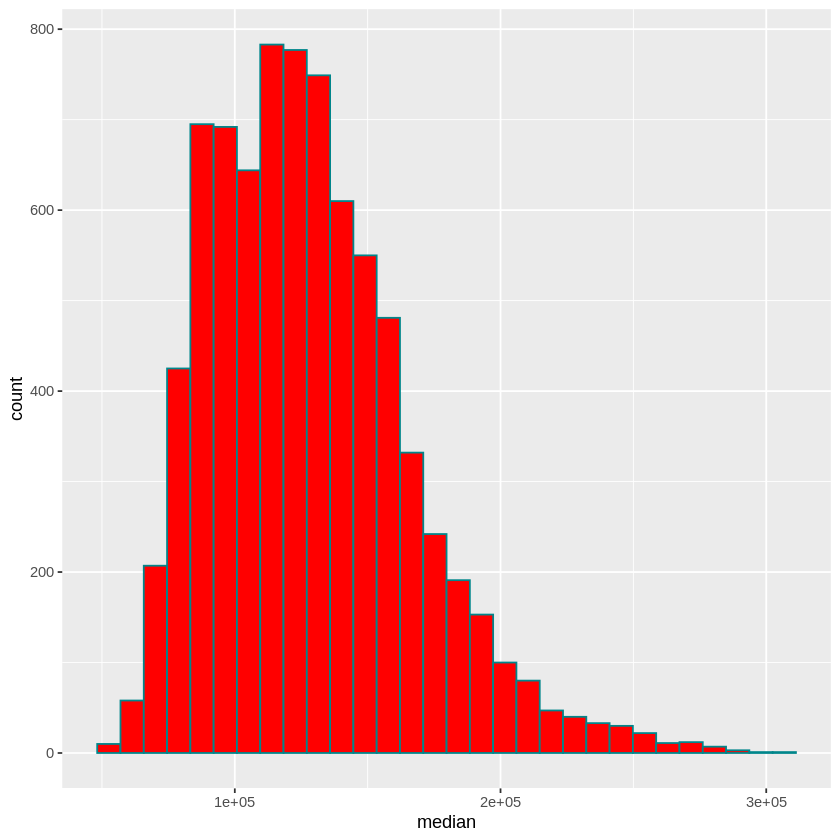

In [ ]:
txh %>% 
  ggplot(aes(median)) +
    geom_histogram(fill = "red", color = "turquoise4")

We observed a positive skew in the median house value in the histogram chart.

## Chart 2: Top 30 Cities by Total Sales

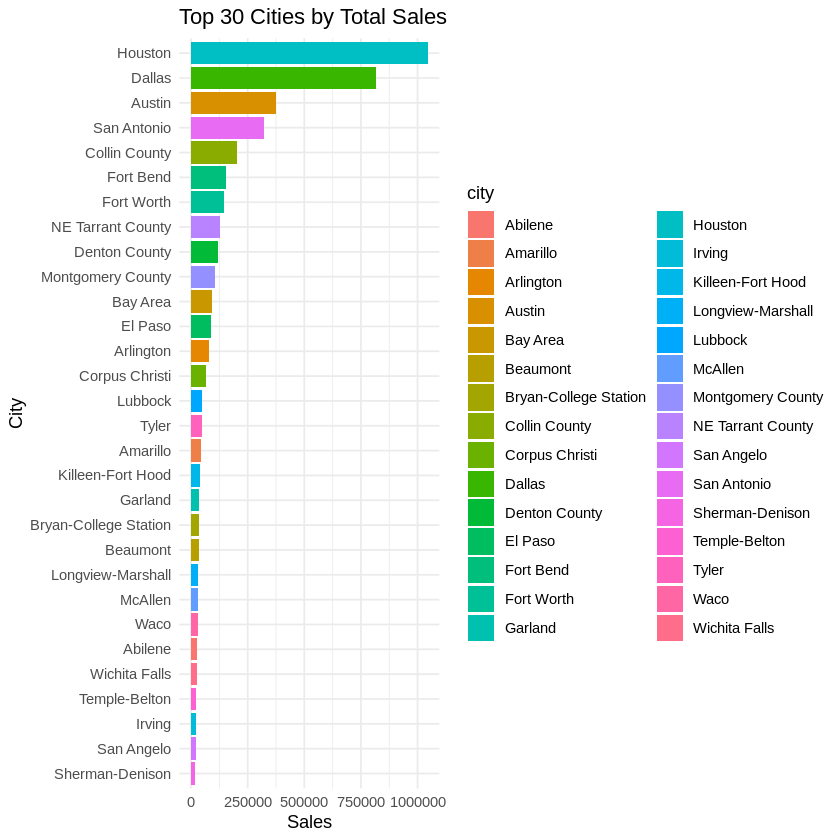

In [ ]:
txh %>% 
  group_by(city) %>% 
  summarise(sum_sales = sum(sales, na.rm = TRUE)) %>% 
  arrange(desc(sum_sales)) %>% 
  head(30) %>% 
  ggplot(aes(x = reorder(city, sum_sales), y = sum_sales, fill = city)) +
    geom_bar(stat = "identity") +
    coord_flip() +
    theme_minimal() +
    labs(title = "Top 30 Cities by Total Sales",
         y = "Sales",
         x = "City")

Houston and Dallas have the most impressive sales on the Top 30 Cities by Total Sales chart.

## Chart 3: The Trend in the Number of Listings

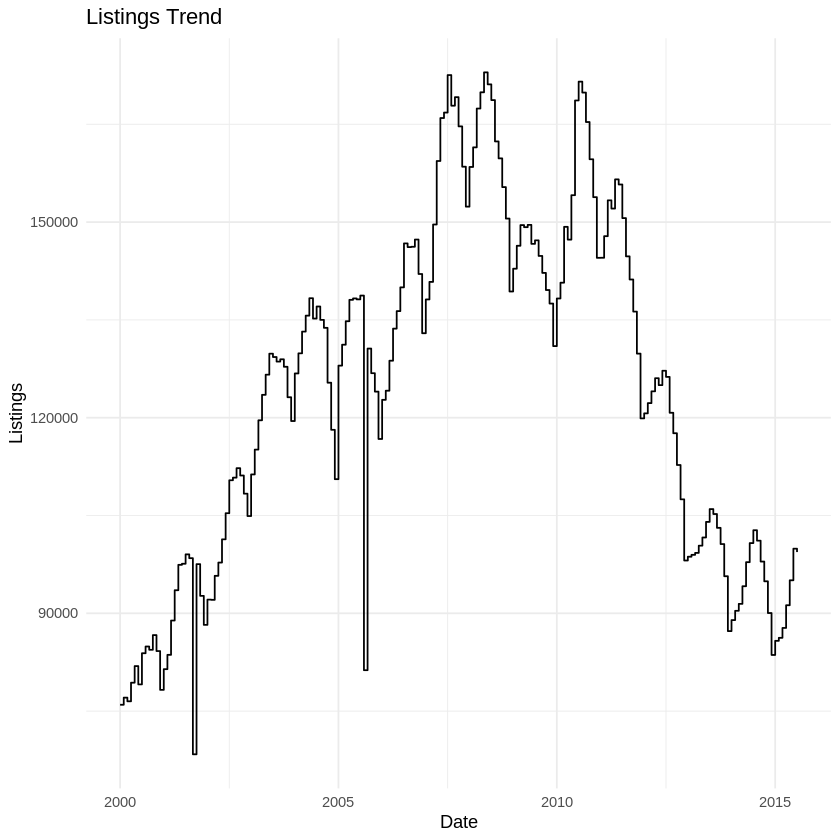

In [ ]:
txh %>% 
  group_by(date) %>% 
  summarise(sum_listings = sum(listings, na.rm = TRUE)) %>% 
  ggplot(aes(date, sum_listings)) + 
    geom_step() +
    theme_minimal() +
    labs(title = "Listings Trend",
         x = "Date",
         y = "Listings")

Since 2010, there has been a decline in the number of listings, as we have seen. It might be a result of the 2008 subprime mortgage crisis.

## Chart 4: The Relationship between Sales and Volume

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
Warning message:
“Removed 568 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 568 rows containing missing values (`geom_point()`).”


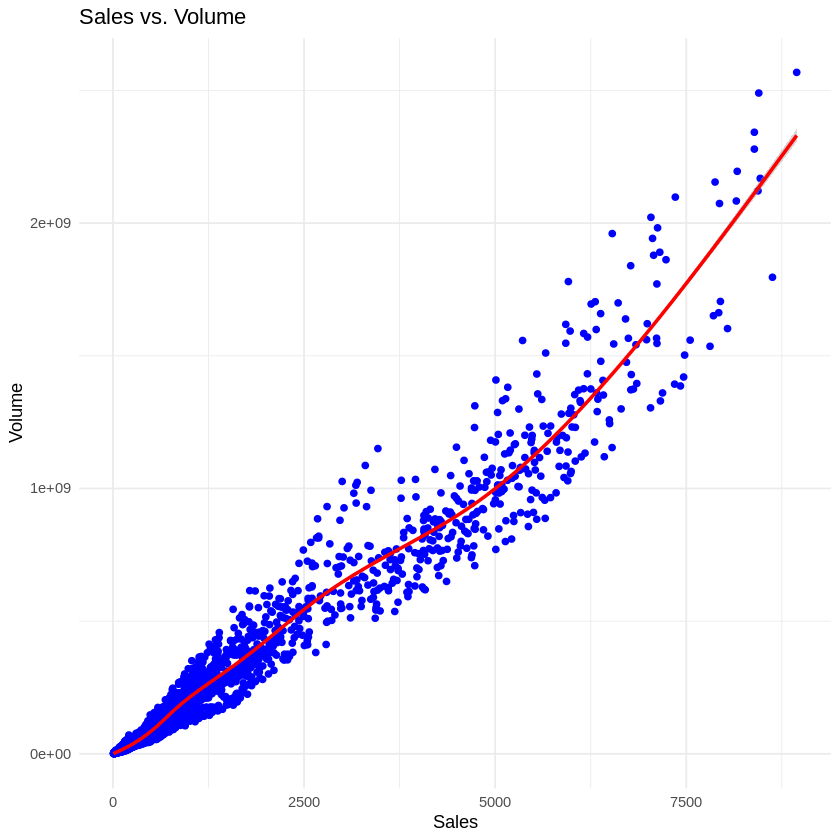

In [ ]:
txh %>% 
  ggplot(aes(sales, volume)) +
    geom_point(color = "blue") +
    geom_smooth(color = "red") +
    theme_minimal() +
    labs(title = "Sales vs. Volume",
         x = "Sales",
         y = "Volume")

The relationship between sales and volume is depicted in the chart as having a positive correlation.

## Chart 5: Monthly Sales

Warning message:
“Removed 568 rows containing missing values (`position_stack()`).”


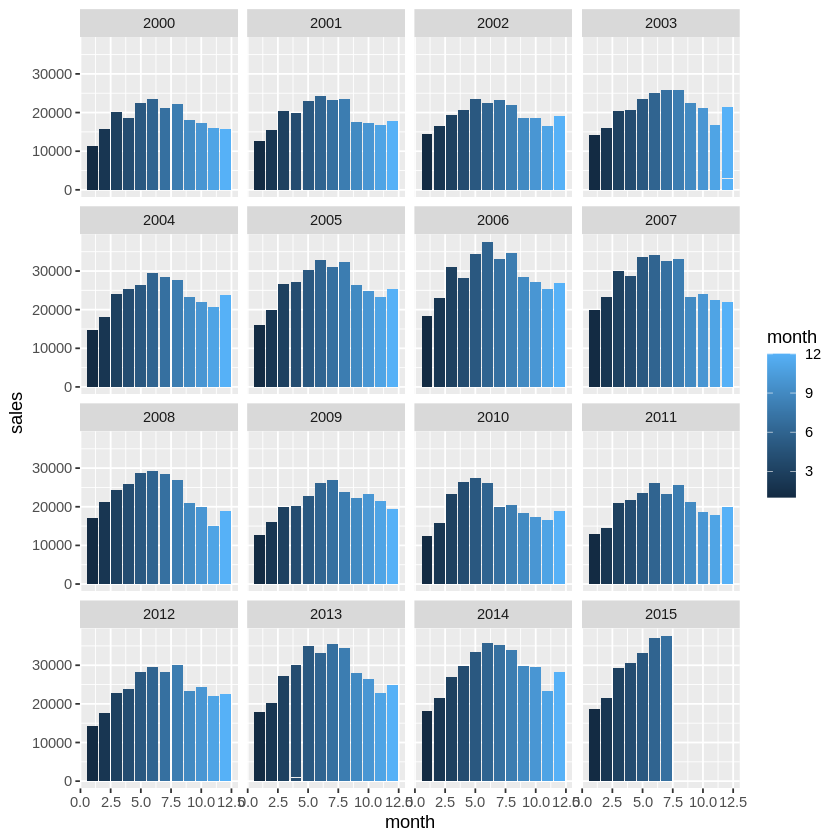

In [ ]:
txh %>% 
  ggplot(aes(month, sales, fill = month)) +
    geom_bar(stat = "identity") +
    facet_wrap(~ year)

According to the graph, there will be more sales in the middle of the year than at the start and end of the year each year.